In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from math import sqrt
import random
from urllib.request import urlopen
try:
  import Image
except ImportError:
  from PIL import Image

In [2]:
class Point:
  
  def __init__(self, coordinates):
    self.coordinates = coordinates

In [3]:
class Cluster:
  
  def __init__(self, center, points):
    self.center = center
    self.points = points

In [4]:
def get_points(image_path):  
  img = Image.open(urlopen(image_path))
  img.thumbnail((200, 400))
  img = img.convert("RGB")
  w, h = img.size
  
  points = []
  for count, color in img.getcolors(w * h):
    for _ in range(count):
      points.append(Point(color))
    
  return points

In [5]:
def euclidean(p, q):
  n_dim = len(p.coordinates)
  return sqrt(sum([
      (p.coordinates[i] - q.coordinates[i]) ** 2 for i in range(n_dim)
  ]))

In [6]:
class KMeans:
  
  def __init__(self, n_clusters, min_diff = 1):
    self.n_clusters = n_clusters
    self.min_diff = min_diff
    
  def calculate_center(self, points):    
    n_dim = len(points[0].coordinates)    
    vals = [0.0 for i in range(n_dim)]    
    for p in points:
      for i in range(n_dim):
        vals[i] += p.coordinates[i]
    coords = [(v / len(points)) for v in vals]    
    return Point(coords)
  
  def assign_points(self, clusters, points):
    plists = [[] for i in range(self.n_clusters)]

    for p in points:
      smallest_distance = float('inf')

      for i in range(self.n_clusters):
        distance = euclidean(p, clusters[i].center)
        if distance < smallest_distance:
          smallest_distance = distance
          idx = i

      plists[idx].append(p)
    
    return plists
    
  def fit(self, points):
    clusters = [Cluster(center=p, points=[p]) for p in random.sample(points, self.n_clusters)]
    
    while True:

      plists = self.assign_points(clusters, points)

      diff = 0

      for i in range(self.n_clusters):
        if not plists[i]:
          continue
        old = clusters[i]
        center = self.calculate_center(plists[i])
        new = Cluster(center, plists[i])
        clusters[i] = new
        diff = max(diff, euclidean(old.center, new.center))

      if diff < self.min_diff:
        break

    return clusters

In [7]:
def rgb_to_hex(rgb):
  return '#%s' % ''.join(('%02x' % p for p in rgb))

def get_colors(filename, n_colors=3):
  points = get_points(filename)
  clusters = KMeans(n_clusters=n_colors).fit(points)
  clusters.sort(key=lambda c: len(c.points), reverse = True)
  rgbs = [map(int, c.center.coordinates) for c in clusters]
  return list(map(rgb_to_hex, rgbs))

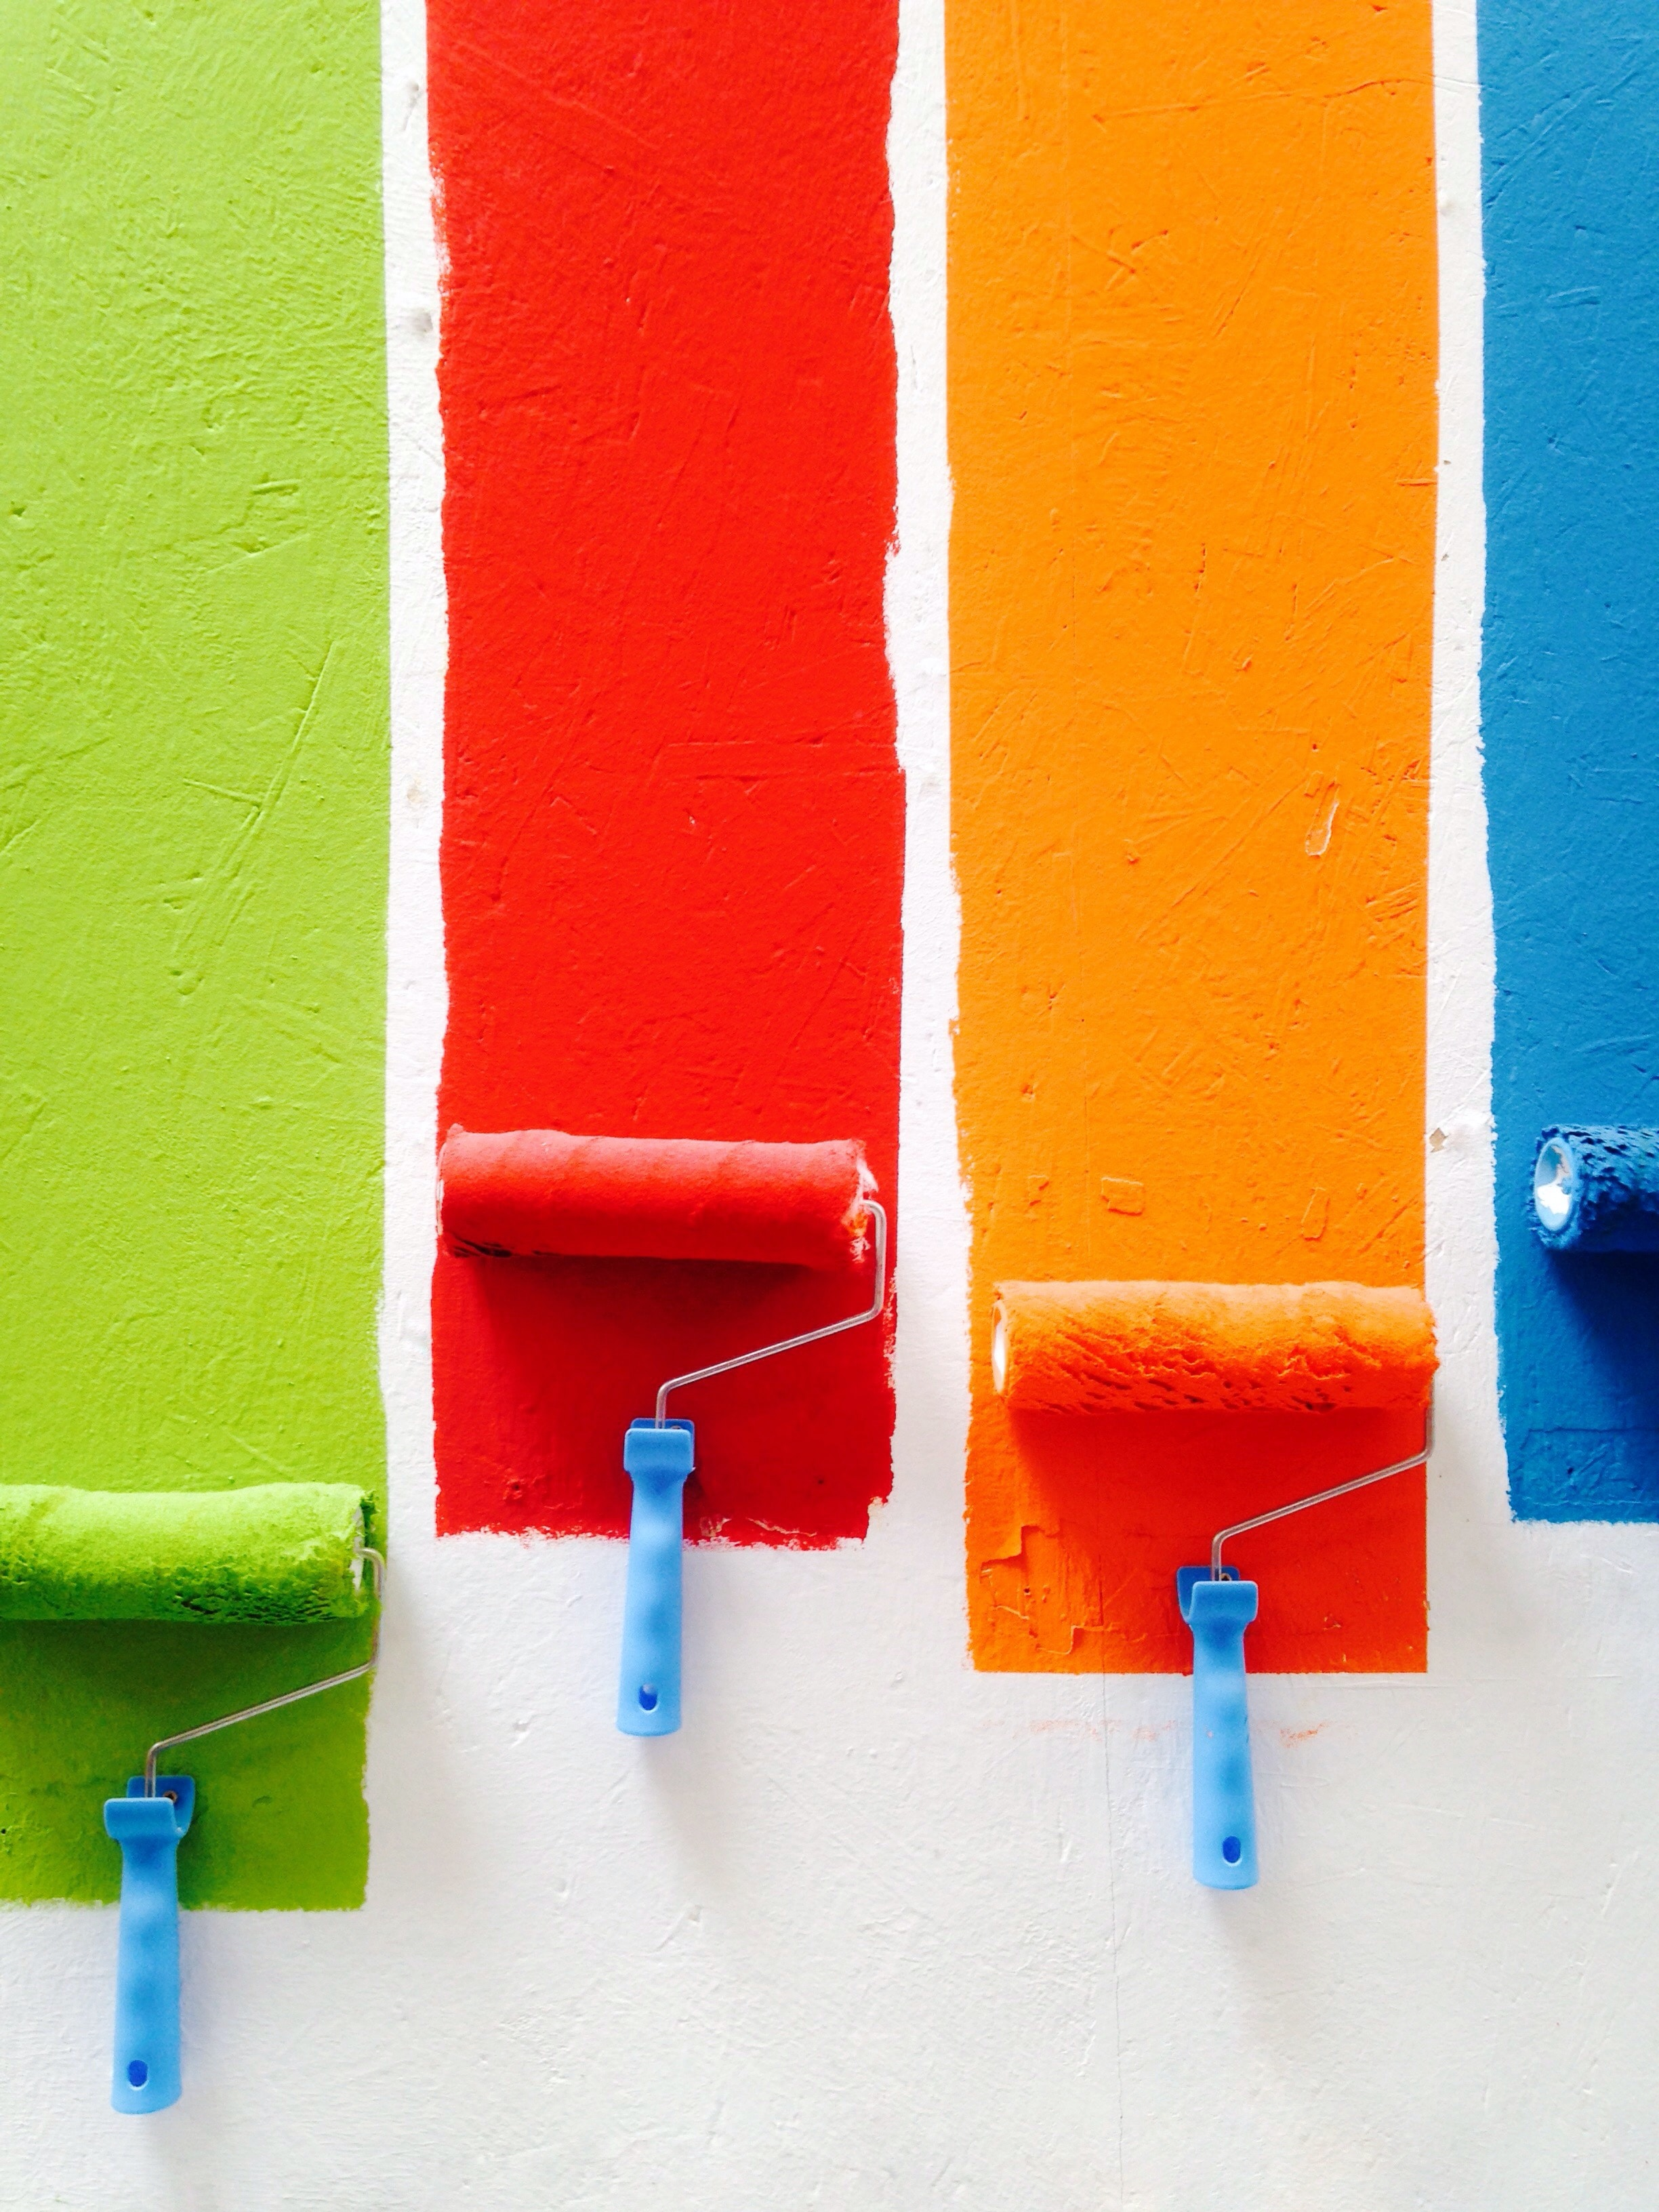

In [8]:
#View the picture
from IPython.display import Image as CImage
url = r"https://raw.githubusercontent.com/jazz1n/color-palette/main/palettes/pic1.jpg"
CImage(url)

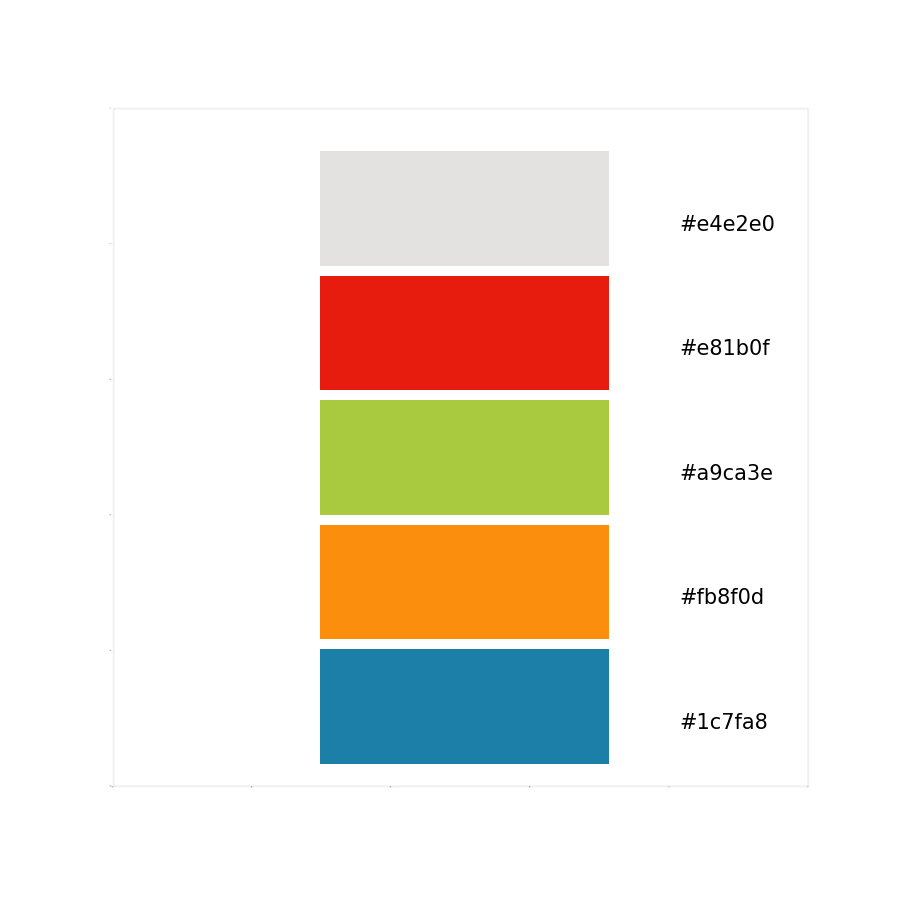

In [9]:
#extract n color points
colors = get_colors(url, n_colors=5)

#create background color
fig, ax = plt.subplots(figsize=(90,90),dpi=10)
fig.set_facecolor('white')
plt.savefig('bg.png')
plt.close(fig)

#create color palette
bg = plt.imread('bg.png')
fig = plt.figure(figsize=(90, 90), dpi = 10)
ax = fig.add_subplot(1,1,1)

x_posi, y_posi, y_posi2 = 320, 25, 25
for c in colors:
    if  colors.index(c) <= 5:
        y_posi += 125
        rect = patches.Rectangle((x_posi, y_posi), 290, 115, facecolor = c)
        ax.add_patch(rect)
        ax.text(x = x_posi+360, y = y_posi+80, s = c, fontdict={'fontsize': 150})
    else:
        y_posi2 += 125
        rect = patches.Rectangle((x_posi + 800, y_posi2), 290, 115, facecolor = c)
        ax.add_artist(rect)
        ax.text(x = x_posi+1160, y = y_posi2+80, s = c, fontdict={'fontsize': 150})
        
ax.axis('off')
plt.imshow(bg)
plt.tight_layout()